# Simulations of scattering event according to original dynamics

In [1]:
using Ranges
using Plots


include("functions.jl")
using .TwoBodyScattering

In [2]:
#Define parameters for simulations

#Parameters taken from experimental values (in micrometers)
permit::Float64 = 6.95*1e-28;
diss_max::Float64 = 3/(4*pi*permit)*(9.76+4.64)^2*1e-32*(25*1e-9)^(-1);
gamma::Float64 = 3*0.56/(4*pi*permit)*(9.76^2-4.64^2)*1e-32*(75*1e-9)^(-1);
int_range::Float64 = 1.0/(120);
v0::Float64 = 50.0;

In [ ]:
#Define required vectors and variables for saving results

total_N::Int64 = 100;
dphi::Float64 = 2*pi/total_N;
phi1seq = range(-pi, pi, total_N);
phi2seq = range(-pi, pi, total_N);
deltaps = Float64[];
dinit = Float64[];

# Simulate the scattering events and save outgoing angle

generate!(dinit, deltaps,
        dphi,
        gamma, v0, int_range, 0.0,
        dtf);

In [ ]:
pos_deltaps = Float64[];
pos_dinit = Float64[];
for i in 1:length(deltaps)
   if deltaps[i] < 0
        push!(pos_dinit, dinit[i]);
        push!(pos_deltaps, deltaps[i]);
    end
end
    

In [ ]:
scatter(dinit,deltaps)

In [72]:
#Run simulations at fixed v_0 for different values of dissipation

#Variables for simulation
total_N::Int64 = 100;
dphi::Float64 = 2*pi/total_N;
phi1seq::Vector{Float64} = range(-pi, pi, total_N);
phi2seq::Vector{Float64} = range(-pi, pi, total_N);
deltaps::Vector{Float64} = Float64[];
thetatot::Vector{Float64} = Float64[];
dinit::Vector{Float64} = Float64[];
dt::Float64 = 1e-2;

#Parameters taken from experimental values (in micrometers)
permit::Float64 = 6.95*1e-28;
diss_max::Float64 = 3/(4*pi*permit)*(9.76+4.64)^2*1e-32*(25*1e-9)^(-1);
gamma::Float64 = 3*0.56/(4*pi*permit)*(9.76^2-4.64^2)*1e-32*(75*1e-9)^(-1);
int_range::Float64 = 1.0/(20);
v0::Float64 = 50.0;

print("Chosen parameters (micrometers): ", "\n",
        "Permittivity: ", permit, "\n",
        "Maximum value of dissipation: ", diss_max, "\n",
        "Intensity of rot. interactions: ", gamma, "\n")

#Ranges of values for dissipation intensity
cranges = 1000:1000:diss_max;
#Vector of averaged of pdp
avgpdps::Vector{Float64} = Vector{Float64}(undef, length(cranges)+1);

#Colours palette
palettes = range(colorant"red", stop=colorant"green", length=length(cranges));

#Generate first plot

generate!(dinit, thetatot, deltaps,
        dphi,
        gamma, v0, int_range, 0.0,
        dt);
rangex = -(pi):dphi:(pi-dphi);
avgpdp = zeros(length(rangex));
totn = zeros(length(rangex));
for x in 1:length(rangex)
    for i in 1:length(dinit)
        if modulate(dinit[i]) <= rangex[x] && modulate(dinit[i]) > rangex[x-1]
            avgpdp[x]+=deltaps[i];
            totn[x]+=1;
        end
    end
end
avgpdp = avgpdp./totn;
v = abs.(sin.(rangex./2)).*avgpdp;
avgpdps[1] = dphi*sum(vcat(v[2:Int((length(rangex)+1)/2)],v[Int((length(rangex)+1)/2)+2:end]));

p = plot(rangex[Int(total_N/2):(total_N-1)], avgpdp[Int(total_N/2):(total_N-1)], xticks=pitick(-pi,pi,4), color = palettes[1], legend=false)
xlabel!(p, "Delta")
ylabel!(p, "pdp")

#Generate plots for all ranges of intensities

for i in 1:length(cranges)
   generate!(dinit, thetatot, deltaps,
        dphi,
        gamma, v0, int_range, cranges[i],
        dt);
    
    avgpdp = zeros(length(rangex));
    totn = zeros(length(rangex));
    for x in 1:length(rangex)
        for i in 1:length(dinit)
            if modulate(dinit[i]) <= rangex[x] && modulate(dinit[i]) > rangex[x-1]
                avgpdp[x]+=deltaps[i];
                totn[x]+=1;
            end
        end
    end
    avgpdp = avgpdp./totn;
    vs = abs.(sin.(rangex./2)).*avgpdp;
    avgpdps[i+1] = dphi*sum(vcat(vs[2:Int((length(rangex)+1)/2)],vs[Int((length(rangex)+1)/2)+2:end]));

    plot!(p, rangex[Int(total_N/2):(total_N-1)], avgpdp[Int(total_N/2):(total_N-1)], xticks=pitick(-pi,pi,4), color = palettes[i])
end

Chosen parameters (micrometers): 
Permittivity: 6.95e-28
Maximum value of dissipation: 28491.253812548555
Intensity of rot. interactions: 1890.9750678550747


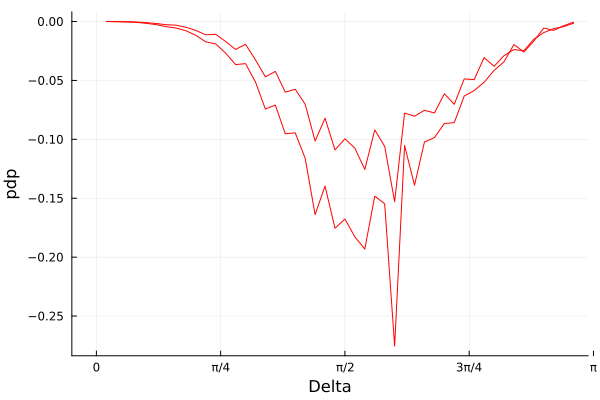

attempt to save state beyond implementation limit
attempt to save state beyond implementation limit
attempt to save state beyond implementation limit


In [70]:
#Plot final result
p
#savefig("pdpv0100VaringDissfrom0to1.pdf")

In [85]:
#Plot dependence of average of pdp on repulsion force
plot(vcat([0],cranges), avgpdps, color=:black, grid = false)
hline!([0,0], style=:dash)
xlabel!("Dissipation Strength")
ylabel!("Average of pdp")
savefig("pdpvStrength.pdf")

"/Users/ciarchi/Desktop/Acadm/MPI/Alignwithsplay/Code/scatteringantialign/Julia/pdpvStrength.pdf"

In [39]:
#Plot movies of single scattering events
phi10::Float64 = +1.2;
phi20::Float64 = -1.2;

pdp, phi1t, phi2t, a11, a22 = TwoBodyScattering.scatteringmovie(phi10, phi20, 1/15, 0.001, gamma, 100.0, 30000.0)

lims = 40;
steps = 1;
animd = @animate for i in 1:steps:length(a11)
    plot(Tuple.(a11[i]), xlims=(-lims,lims+500), ylims=(-lims+lims/2,lims))
    plot!(Tuple.(a22[i]))
end

Animation("/var/folders/jn/hzpz5fjx36x_y2ydy2_b66sc0000gp/T/jl_5Xie0M", ["000001.png", "000002.png", "000003.png", "000004.png", "000005.png", "000006.png", "000007.png", "000008.png", "000009.png", "000010.png"  …  "000840.png", "000841.png", "000842.png", "000843.png", "000844.png", "000845.png", "000846.png", "000847.png", "000848.png", "000849.png"])

┌ Info: Saved animation to /var/folders/jn/hzpz5fjx36x_y2ydy2_b66sc0000gp/T/jl_lWPgXA5qJQ.gif
└ @ Plots /Users/ciarchi/.julia/packages/Plots/sxUvK/src/animation.jl:156


Plots.AnimatedGif("/var/folders/jn/hzpz5fjx36x_y2ydy2_b66sc0000gp/T/jl_lWPgXA5qJQ.gif")
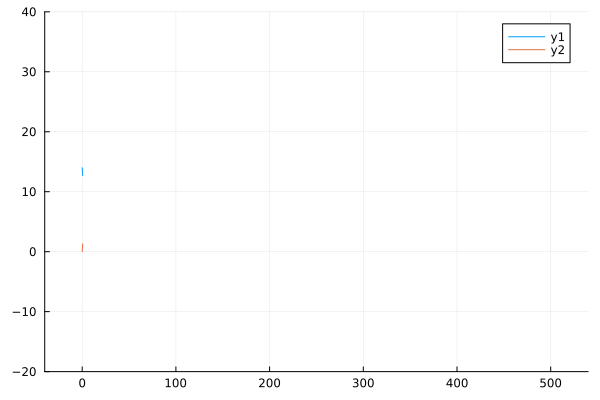

In [40]:
gif(animd, fps = 300)

In [12]:
permit::Float64 = 6.95*1e-28;
diss_max::Float64 = 3/(4*pi*permit)*(9.76+4.64)^2*1e-32*(25*1e-9)^(-1);
gamma::Float64 = 3*0.56/(4*pi*permit)*(9.76^2-4.64^2)*1e-32*(75*1e-9)^(-1);
print(permit, " ", diss_max, " ", gamma, "\n")
print(diss_max*exp(-1.5/120)*(10)^(-4))

6.95e-28 28491.253812548555 1890.9750678550747
2.813732977350962

In [ ]:
a11